In [6]:
# !pip install opencv-python

In [ ]:
os.path.join(f"/content/gdrive/MyDrive/angles_detector.v4-1.yolov8/test/images", random_file)

Top vertex angle of the triangle: 38.59 degrees


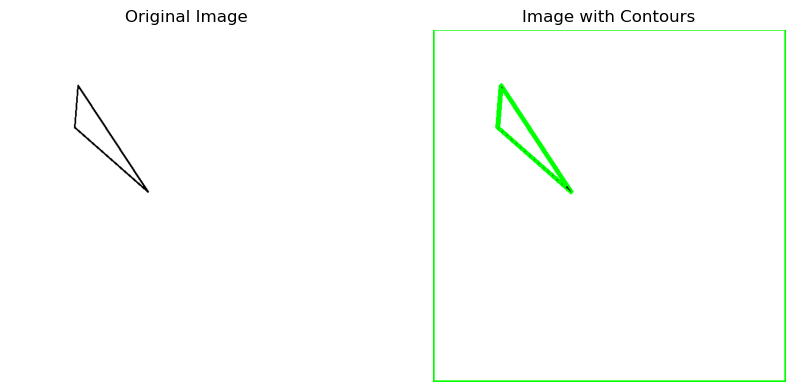

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def angle_between_points(p0, p1, p2):
    a = np.array(p0) - np.array(p1)
    b = np.array(p2) - np.array(p1)
    cosine_angle = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

# Set a random seed for reproducibility
#np.random.seed(5)

# Create a white image
width, height = 640, 640
image = np.ones((height, width, 3), dtype=np.uint8) * 255

# Generate coordinates for a random triangle
vertices = np.random.randint(100, 300, size=(3, 2))

# Draw the triangle
cv2.polylines(image, [vertices], isClosed=True, color=(0, 0, 0), thickness=2)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, threshold_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(threshold_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)

# Find the triangle among contours and calculate the top angle
for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    if len(approx) == 3:
        vertices = approx.reshape(-1, 2)
        vertices = vertices[np.argsort(vertices[:, 1])]
        
        top_angle = angle_between_points(vertices[1], vertices[0], vertices[2])
        print(f"Top vertex angle of the triangle: {top_angle:.2f} degrees")
        break
else:
    print("Triangle not found")

# Convert BGR images to RGB for displaying in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

# Display the images side by side using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Display the image with contours
axs[1].imshow(contour_image_rgb)
axs[1].set_title('Image with Contours')
axs[1].axis('off')

plt.show()